In [3]:
from scipy import stats
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np

In [11]:
conv2d_normal=[91.68, 97.38, 88.88, 91.35, 90.53, 92.37, 89.47, 94.44, 95.32, 98.67, 90.81]
conv1d_best=[93.68, 96.56, 88.54, 92.27, 92.46, 91.40, 89.68, 94.48, 94.94, 98.63, 92.88]
conv2d_big=[92.45741963386536, 95.29914259910583, 87.95685768127441, 92.92542934417725, 94.6610689163208, 88.92943859100342, 88.11401128768921, 97.38048315048218, 95.75795531272888, 95.27607560157776, 89.00966048240662]
conv2d_6channels=[92.508339, 96.31465, 87.53048, 91.90, 89.95, 88.60, 85.00, 95.76, 93.38,95.20, 91.67]
conv2d_conv5=[93.18735003471375, 95.90964317321777, 85.7998788356781, 93.24410557746887, 95.62087655067444, 88.38199377059937, 83.99029970169067, 97.70792126655579, 95.50842046737671, 95.3987717628479, 91.06280207633972]
conv2d_conv3=[94.09975409507751, 95.29914259910583, 88.85560035705566, 92.73422360420227, 92.80143976211548, 91.66666865348816, 83.44451189041138, 97.51145839691162, 96.31940126419067, 95.70552110671997, 90.33816456794739]
conv2d_kernel30=[93.49148273468018, 95.60439586639404, 88.01677823066711, 92.60675311088562, 92.6814615726471, 92.82238483428955, 84.59672331809998, 98.62475395202637, 95.69557309150696, 97.9141116142273, 91.78743958473206]
time_space=[93.7347948551178, 96.21489644050598, 89.45476412773132, 89.99362587928772, 92.32153296470642, 93.61313581466675, 85.38508415222168, 97.4459707736969, 94.94697451591492, 96.80981636047363, 93.35748553276062]

In [5]:
from scipy import stats
print("p_val tra original conv1d e conv2d 6 channels with no dense layer: ", stats.ttest_rel([93.68, 96.56, 88.54, 92.27, 92.46, 91.40, 89.68, 94.48, 94.94, 98.63, 92.88],[93.18735003471375, 95.90964317321777, 85.7998788356781, 93.24410557746887, 95.62087655067444, 88.38199377059937, 83.99029970169067, 97.70792126655579, 95.50842046737671, 95.3987717628479, 91.06280207633972]))
print("p_val conv 2D 6 channels with dense e conv2d 6 channels with no dense layer: ", stats.ttest_rel([92.45741963386536, 95.29914259910583, 87.95685768127441, 92.92542934417725, 94.6610689163208, 88.92943859100342, 88.11401128768921, 97.38048315048218, 95.75795531272888, 95.27607560157776, 89.00966048240662],[93.18735003471375, 95.90964317321777, 85.7998788356781, 93.24410557746887, 95.62087655067444, 88.38199377059937, 83.99029970169067, 97.70792126655579, 95.50842046737671, 95.3987717628479, 91.06280207633972]))
print("p_val tra original conv1d e conv2d 6 channels with no dense layer: ", stats.ttest_rel([93.68, 96.56, 88.54, 92.27, 92.46, 91.40, 89.68, 94.48, 94.94, 98.63, 92.88],conv2d_nodense_noconv3))
print("p_val tra original conv1d e conv2d 6 channels with no dense layer: ", stats.ttest_rel([93.68, 96.56, 88.54, 92.27, 92.46, 91.40, 89.68, 94.48, 94.94, 98.63, 92.88],new_model))

p_val tra original conv1d e conv2d 6 channels with no dense layer:  Ttest_relResult(statistic=1.0581884514997884, pvalue=0.314861132258939)
p_val conv 2D 6 channels with dense e conv2d 6 channels with no dense layer:  Ttest_relResult(statistic=0.35274465140938077, pvalue=0.7316017111428914)
p_val tra original conv1d e conv2d 6 channels with no dense layer:  Ttest_relResult(statistic=0.8093582503201957, pvalue=0.4371430178423723)
p_val tra original conv1d e conv2d 6 channels with no dense layer:  Ttest_relResult(statistic=0.22987678723868848, pvalue=0.8228214528528747)


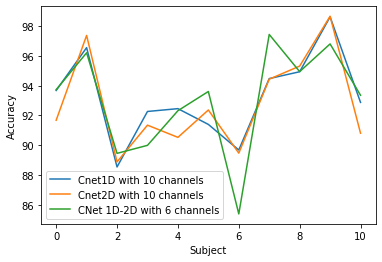

In [9]:
plt.figure()
plt.plot(conv1d_best),plt.plot(conv2d_normal), plt.plot(time_space)
plt.xlabel("Subject", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.legend(["Cnet1D with 10 channels", "Cnet2D with 10 channels", "CNet 1D-2D with 6 channels"], fontsize=10)
x = np.array([1,2,3,4,5,6,7,8,9,10,11])

In [12]:
error_conv5=(100-np.array(conv2d_conv5))/100
error_conv3=(100-np.array(conv2d_conv3))/100
error_kernel30=(100-np.array(conv2d_kernel30))/100
error_time_space=(100-np.array(time_space))/100

const=1.96
n=1800
conf_conv5=const * np.sqrt( (error_conv5 * (1 - error_conv5)) / n)
conf_conv3=const * np.sqrt( (error_conv3 * (1 - error_conv3)) / n)
conf_kernel30=const * np.sqrt( (error_kernel30 * (1 - error_kernel30)) / n)
conf_time_space=const * np.sqrt( (error_time_space * (1 - error_time_space)) / n)

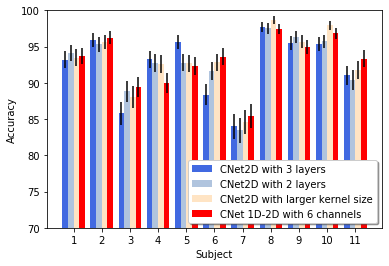

In [25]:
plt.figure()
plt.bar(x-0.3, conv2d_conv5, width=0.2, color='royalblue', yerr=conf_conv5*100,align='center')
plt.bar(x-0.1, conv2d_conv3, width=0.2, color='lightsteelblue',yerr=conf_conv3*100, align='center')
plt.bar(x+0.1, conv2d_kernel30, width=0.2, color='bisque',yerr=conf_kernel30*100, align='center')
plt.bar(x+0.3, time_space, width=0.2, color='red', yerr=conf_time_space*100,align='center')
plt.legend(["CNet2D with 3 layers", "CNet2D with 2 layers", "CNet2D with larger kernel size", "CNet 1D-2D with 6 channels"], loc="lower right", fontsize=10, facecolor="white", shadow=5 )
plt.xticks(x)
plt.ylim([70,100])
plt.xlabel("Subject", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.savefig("C://Users//noemi//Desktop//university//university//tesi/Thesis-XAI/resources/images_tesi/6channelsresults.png")
plt.show()

In [ ]:
from statsmodels.stats.proportion import proportion_confint
for i in range (11):
    lower, upper = proportion_confint(int(conv1d_best[i]*1800/100), 1800, 0.05)
    print('lower=%.3f, upper=%.3f' % (lower, upper))

In [6]:
#random models
CONV2D_2468910=[98.66179823875427, 94.74969506263733, 88.73577117919922, 86.42447590827942, 94.48110461235046, 90.8150851726532, 88.65979313850403, 95.2848732471466, 94.69743967056274, 92.63803958892822, 90.03623127937317]
conv2D_5678910=[94.64720487594604, 96.21489644050598, 89.21509981155396, 91.33206009864807, 93.1013822555542, 90.20681381225586, 85.68829298019409, 98.23182821273804, 96.19463682174683, 96.56441807746887, 91.54589176177979]

In [34]:
print("p_val tra original conv1d e conv2d  ", stats.ttest_rel(conv1d_best, conv2d_kernel30))
print("p_val tra original conv1d e conv1d-2d 6 channels  ", stats.ttest_rel(conv1d_best, conv2d_conv3))
print("p_val tra original conv2d e conv1d-2d", stats.ttest_rel(conv2d_normal, conv2d_kernel30))
print("p_val tra original conv2d e conv1d-2d", stats.ttest_rel(conv2d_normal, conv2d_conv3))


p_val tra original conv1d e conv2d   Ttest_relResult(statistic=0.22987678723868848, pvalue=0.8228214528528747)
p_val tra original conv1d e conv1d-2d 6 channels   Ttest_relResult(statistic=0.8093582503201957, pvalue=0.4371430178423723)
p_val tra original conv2d e conv1d-2d Ttest_relResult(statistic=-0.3757198424565832, pvalue=0.7149725318568928)
p_val tra original conv2d e conv1d-2d Ttest_relResult(statistic=0.23688384083631892, pvalue=0.8175289575929093)


In [30]:
model=conv1d_best
print(np.mean(model))
print(np.std(model))

93.22909090909091
2.771978140230789


In [32]:
model=conv2d_normal
print(np.mean(model))
print(np.std(model))
model=conv2d_conv5
print(np.mean(model))
print(np.std(model))
model=conv2d_conv3
print(np.mean(model))
print(np.std(model))
model=conv2d_kernel30
print(np.mean(model))
print(np.std(model))
model=time_space
print(np.mean(model))
print(np.std(model))

92.8090909090909
3.0686462948089384
92.34655120156027
4.296285072264052
92.61598966338418
3.8260060297310265
93.07653253728694
3.898927425975199
93.0252801288258
3.4311208653461946


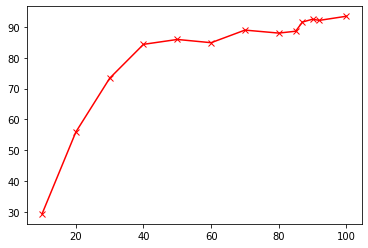

In [4]:
percentage=[10,20,30,40,50,60,70,80,85, 87, 90, 92, 100]

values=[29.30, 55.90, 73.36, 84.37, 85.95, 84.90, 88.99, 88.02, 88.63,  91.61, 92.52, 92.15, 93.49]
plt.figure()
plt.plot(percentage, values, "-rx")

In [2]:
import matplotlib.pyplot as plt